# Explore here

In [337]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
import joblib

In [338]:
data=pd.read_csv("../Water_Spring_Lupa.csv")
data

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN
...,...,...,...
4194,26/06/2020,0.000,-73.93
4195,27/06/2020,0.000,-73.60
4196,28/06/2020,0.000,-73.14
4197,29/06/2020,0.000,-72.88


In [339]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_Terni,4199.0,2.466355,2.041837,0.00,1.402,2.142,3.165,76.0
Flow_Rate_Lupa,3817.0,-97.712916,15.026314,-182.31,-105.760,-96.590,-87.220,0.0


In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4199 non-null   object 
 1   Rainfall_Terni  4199 non-null   float64
 2   Flow_Rate_Lupa  3817 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.5+ KB


In [341]:
data.isnull().sum()

Date                0
Rainfall_Terni      0
Flow_Rate_Lupa    382
dtype: int64

In [342]:
data.duplicated().sum()

0

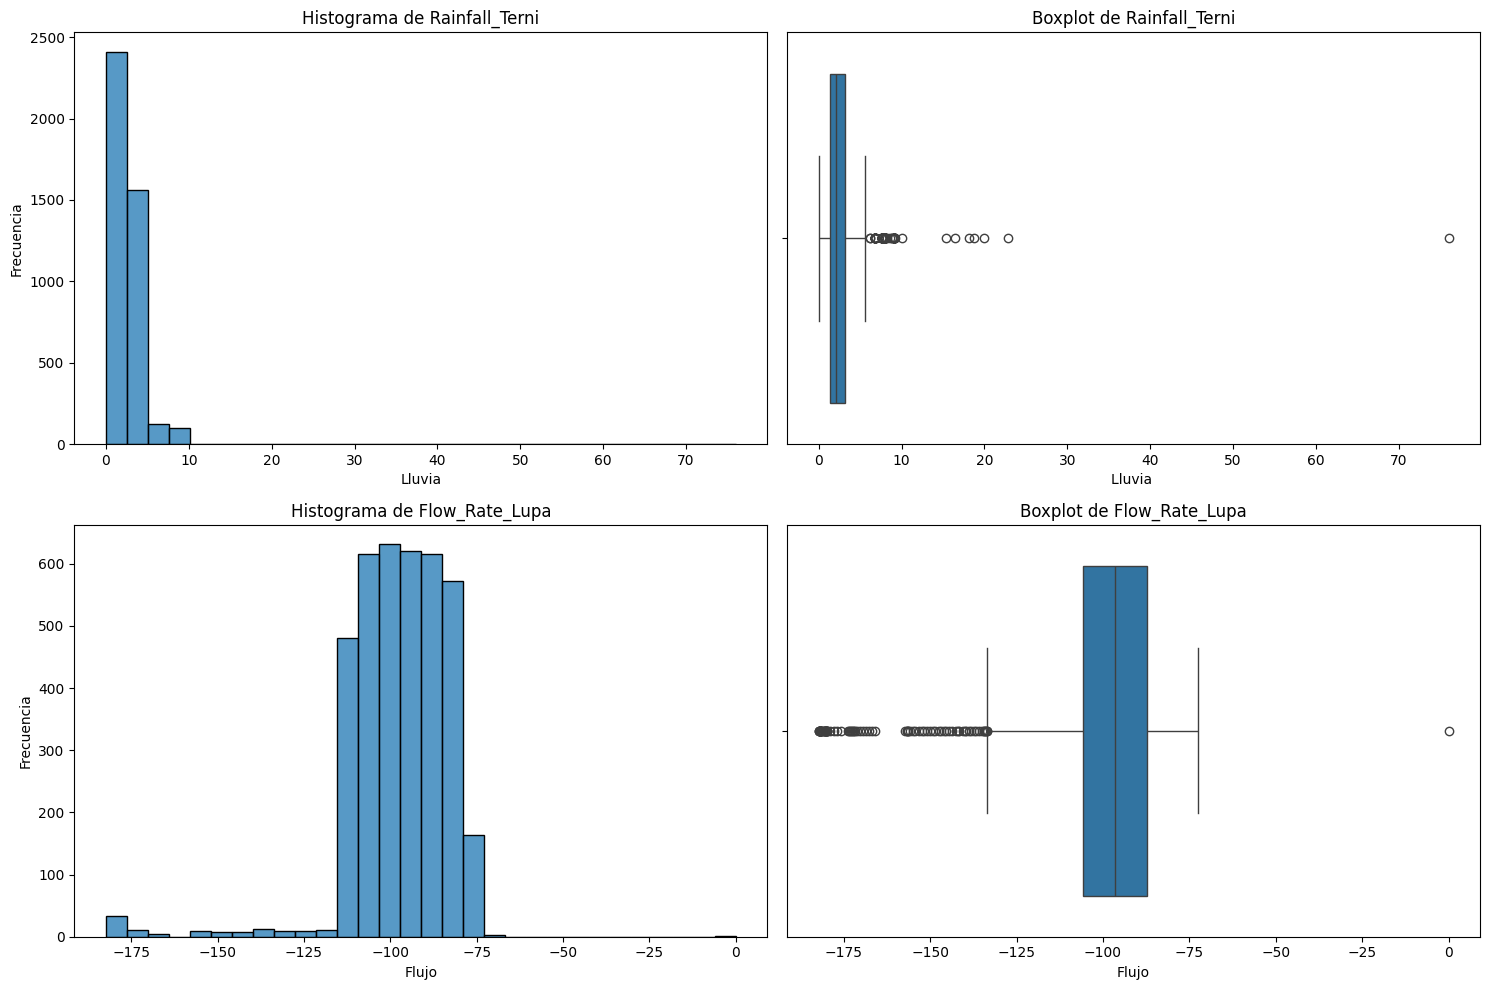

In [343]:
plt.figure(figsize=(15, 10))

# Histograma para Rainfall_Terni
plt.subplot(2, 2, 1)
sns.histplot(data['Rainfall_Terni'], bins=30)
plt.title('Histograma de Rainfall_Terni')
plt.xlabel('Lluvia')
plt.ylabel('Frecuencia')

# Boxplot para Rainfall_Terni
plt.subplot(2, 2, 2)
sns.boxplot(x=data['Rainfall_Terni'])
plt.title('Boxplot de Rainfall_Terni')
plt.xlabel('Lluvia ')

# Histograma para Flow_Rate_Lupa
plt.subplot(2, 2, 3)
sns.histplot(data['Flow_Rate_Lupa'], bins=30)
plt.title('Histograma de Flow_Rate_Lupa')
plt.xlabel('Flujo')
plt.ylabel('Frecuencia')

# Boxplot para Flow_Rate_Lupa
plt.subplot(2, 2, 4)
sns.boxplot(x=data['Flow_Rate_Lupa'])
plt.title('Boxplot de Flow_Rate_Lupa')
plt.xlabel('Flujo')

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

In [344]:
data.dropna(subset=['Flow_Rate_Lupa', 'Rainfall_Terni'], inplace=True)
data

,Date,Rainfall_Terni,Flow_Rate_Lupa
49,19/02/2009,2.763,-166.02
50,20/02/2009,2.763,-166.97
51,21/02/2009,2.763,-167.72
52,22/02/2009,2.763,-168.65
53,23/02/2009,2.763,-169.42
...,...,...,...
4194,26/06/2020,0.000,-73.93
4195,27/06/2020,0.000,-73.60
4196,28/06/2020,0.000,-73.14
4197,29/06/2020,0.000,-72.88


In [345]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_Terni,3817.0,2.470262,2.099983,0.00,1.402,2.131,3.165,76.0
Flow_Rate_Lupa,3817.0,-97.712916,15.026314,-182.31,-105.760,-96.590,-87.220,0.0


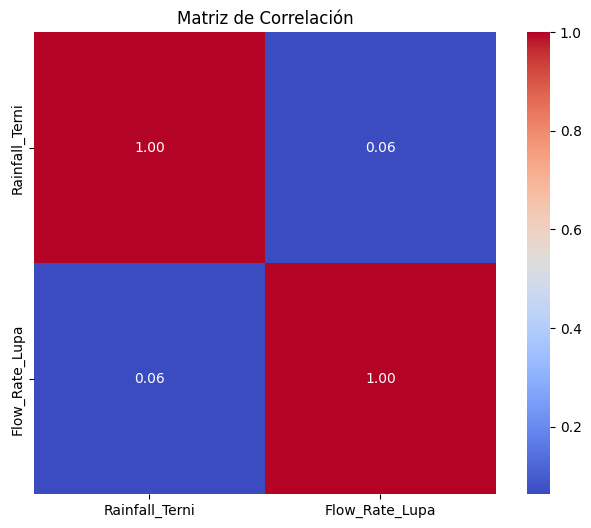

In [348]:
data_numeric = data.drop(columns=['Date'])

correlation_matrix = data_numeric.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Matriz de Correlación')
plt.show()

In [349]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)
ts=data[["Flow_Rate_Lupa","Rainfall_Terni"]]
ts


,Flow_Rate_Lupa,Rainfall_Terni
Date,,
2009-02-19,-166.02,2.763
2009-02-20,-166.97,2.763
2009-02-21,-167.72,2.763
2009-02-22,-168.65,2.763
2009-02-23,-169.42,2.763
...,...,...
2020-06-26,-73.93,0.000
2020-06-27,-73.60,0.000
2020-06-28,-73.14,0.000


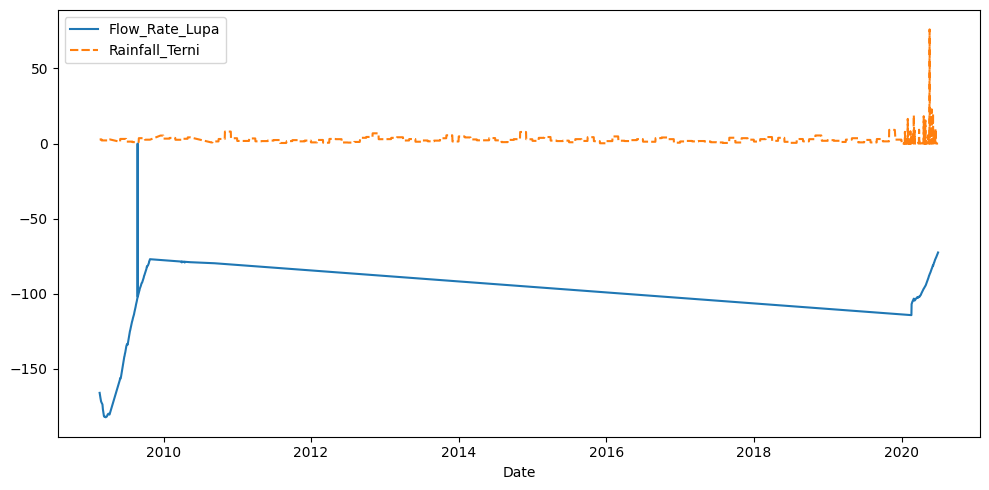

In [350]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [351]:
decomposition_flow = seasonal_decompose(ts['Flow_Rate_Lupa'],period=365)

decomposition_rainfall = seasonal_decompose(ts['Rainfall_Terni'],period=365)


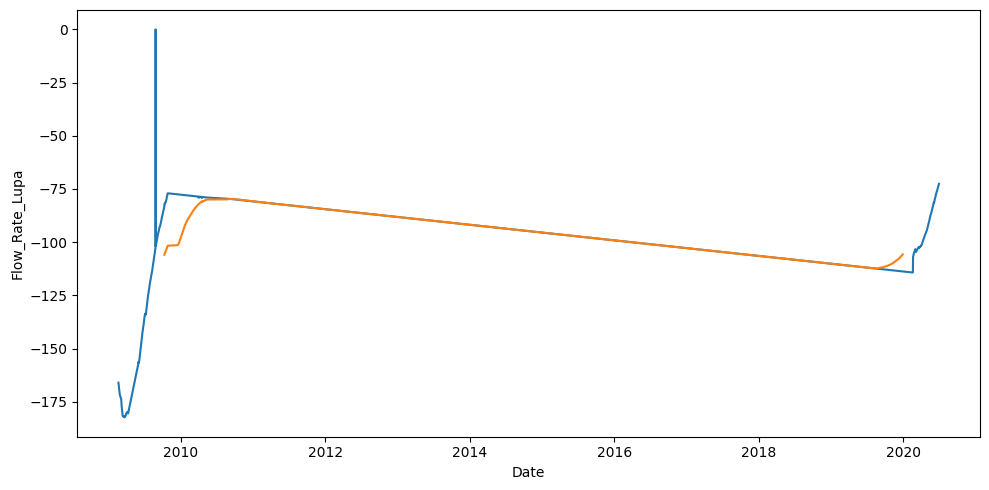

In [352]:
trend = decomposition_flow.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts['Flow_Rate_Lupa'])
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

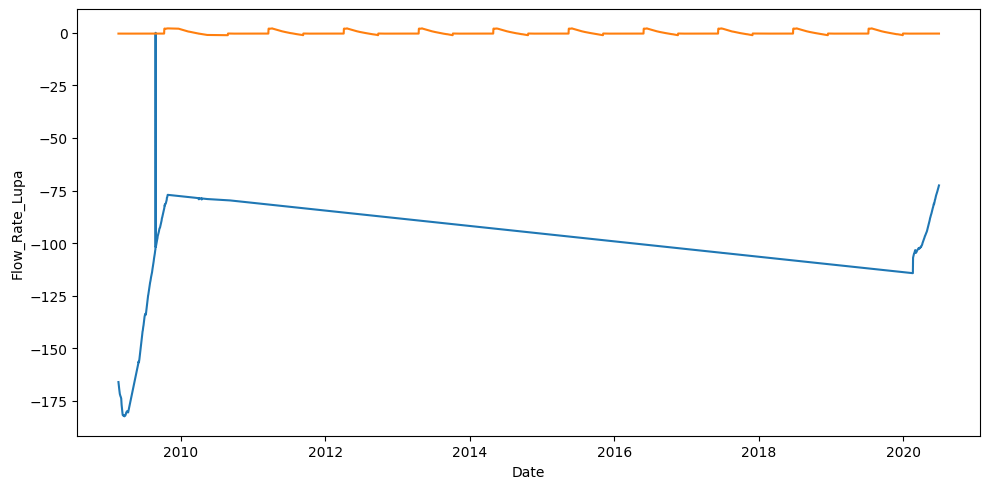

In [353]:
seasonal = decomposition_flow.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts['Flow_Rate_Lupa'])
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [354]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts['Flow_Rate_Lupa'])

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -7.092385e+00
p-value                        4.376280e-10
#Lags Used                     2.800000e+01
Number of Observations Used    3.788000e+03
Critical Value (1%)           -3.432077e+00
Critical Value (5%)           -2.862303e+00
Critical Value (10%)          -2.567176e+00
dtype: float64

Es estacionaria

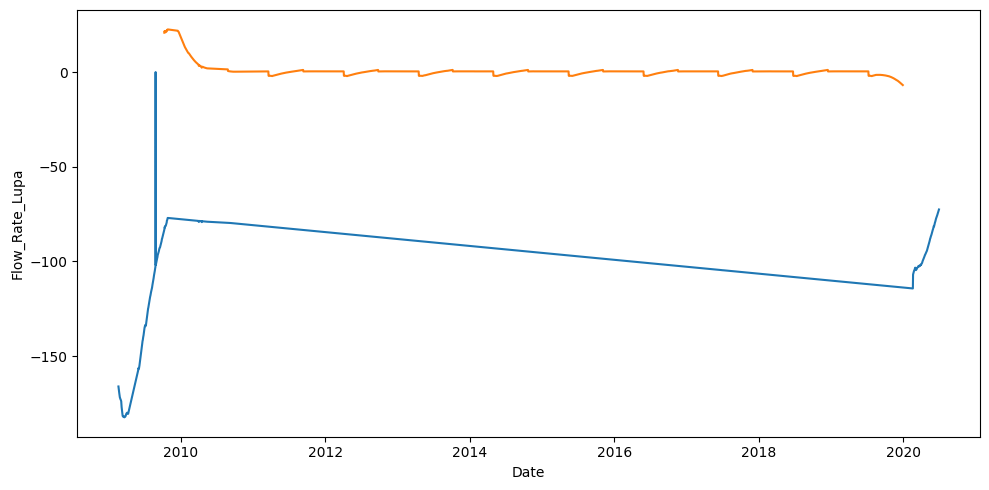

In [355]:
residual = decomposition_flow.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts['Flow_Rate_Lupa'])
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

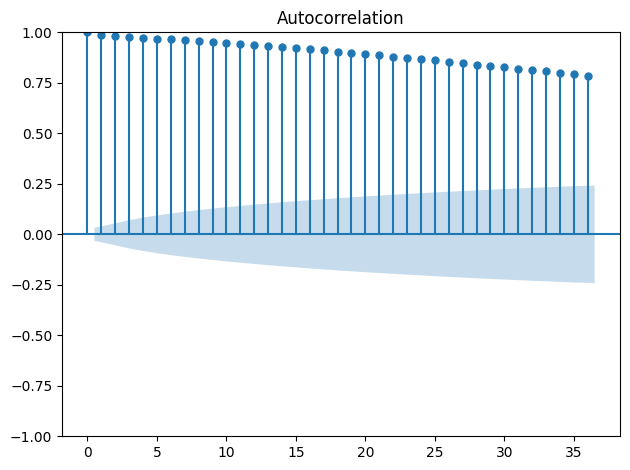

In [356]:
plot_acf(ts['Flow_Rate_Lupa'])

plt.tight_layout()

plt.show()

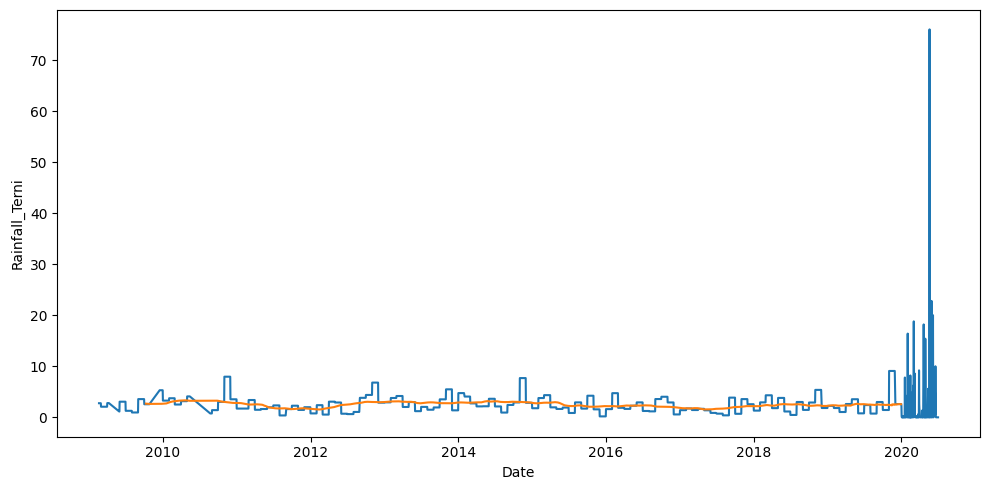

In [357]:
trend = decomposition_rainfall.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts['Rainfall_Terni'])
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

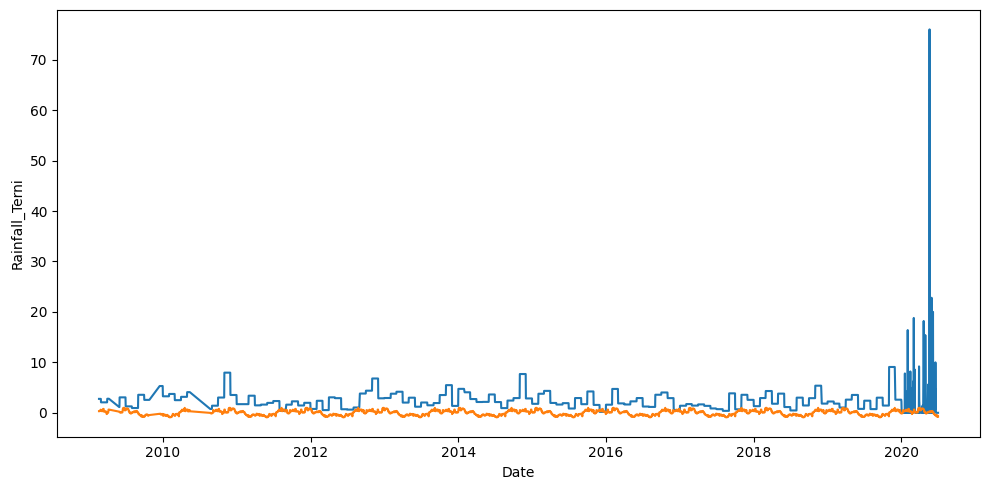

In [358]:
seasonal = decomposition_rainfall.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts['Rainfall_Terni'])
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [359]:
test_stationarity(ts['Rainfall_Terni'])

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -8.799058e+00
p-value                        2.136788e-14
#Lags Used                     3.000000e+01
Number of Observations Used    3.786000e+03
Critical Value (1%)           -3.432078e+00
Critical Value (5%)           -2.862304e+00
Critical Value (10%)          -2.567177e+00
dtype: float64

Es tambien estacionaria

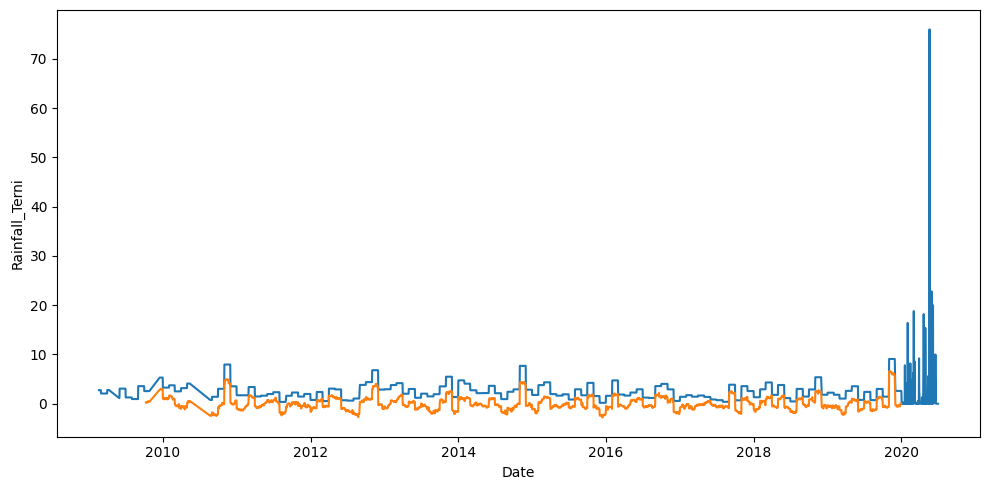

In [362]:
residual = decomposition_rainfall.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts['Rainfall_Terni'])
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

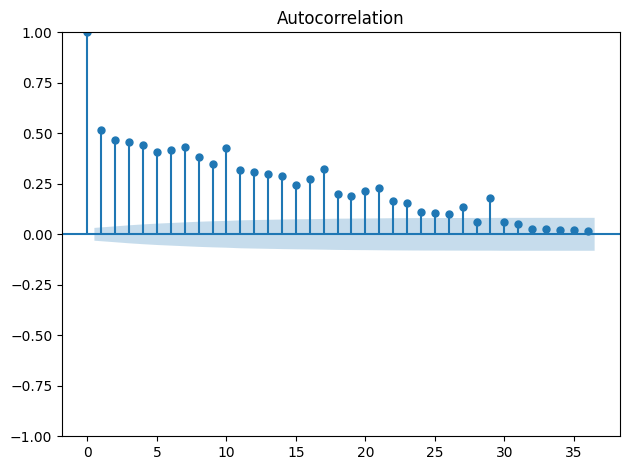

In [363]:
plot_acf(ts['Rainfall_Terni'])

plt.tight_layout()

plt.show()